2024-04-03 14:33:42.755678: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 14:33:42.755714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 14:33:42.757101: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-03 14:33:42.765091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 14:33:43.789768: W tensorflow/compiler/tf2

Segmentation Models: using `tf.keras` framework.
/media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/1.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/2.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/3.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/4.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/5.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/6.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/7.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/8.jpg
Now patchifying image: /media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/images/9.jpg
Now patchifying image: /media/ExtHDD01/a

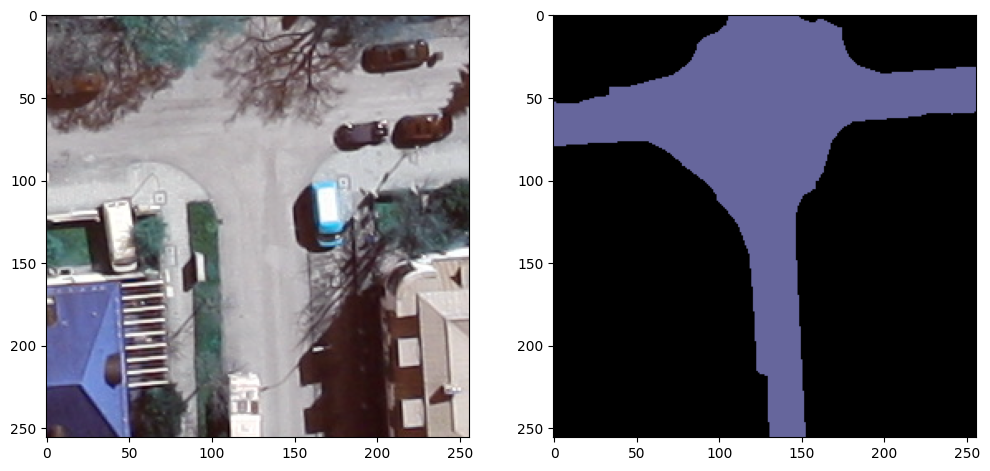

60
[102 102 156]
[0 0 0]
Unique labels in label dataset are:  [0 1]


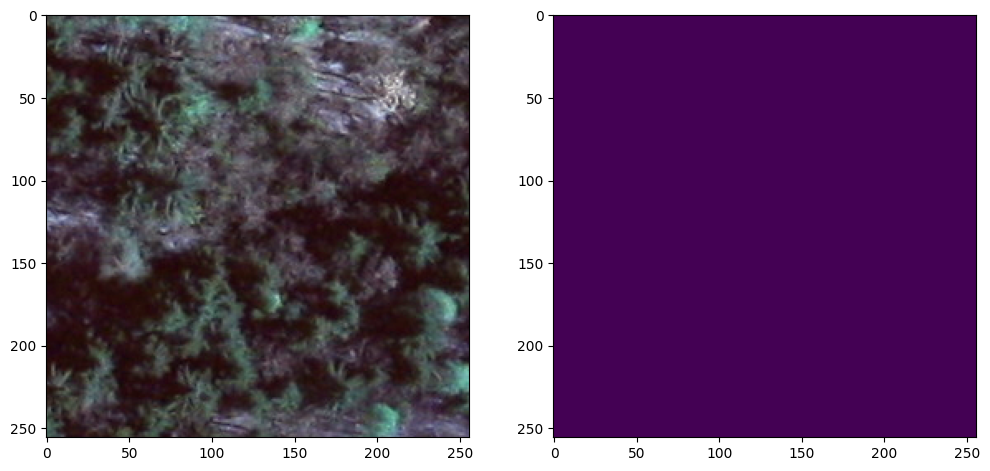

(2940, 256, 256, 2)
Image Height:  256
Image Width:  256
Image Channels:  3


In [2]:
from sklearn.model_selection import train_test_split
from whole_code_beforemodel import X_train, y_train, X_test, y_test,n_classes, IMG_CHANNELS, IMG_HEIGHT, IMG_WIDTH, total_loss 
from simple_multi_unet_model import multi_unet_model

In [2]:

import tensorflow as tf
from keras import backend as K

def jacard_coef(y_true, y_pred):
    y_true_f = tf.reshape(y_true, (-1,))  # Flatten the tensor
    y_pred_f = tf.reshape(y_pred, (-1,))  # Flatten the tensor
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) - intersection + 1.0)

metrics=['accuracy', jacard_coef]

def get_model():
    return multi_unet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss=total_loss, metrics=metrics)
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)
model.summary()
model.input_shape, model.output_shape 



2024-03-28 23:21:48.117366: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,122 (7.40 MB)

 Trainable params: 1,941,122 (7.40 MB)

 Non-trainable params: 0 (0.00 B)

((None, 256, 256, 3), (None, 256, 256, 2))

In [9]:

history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

#Minmaxscaler
#With weights...[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]   in Dice loss
#With focal loss only, after 100 epochs val jacard is: 0.62  (Mean IoU: 0.6)            
#With dice loss only, after 100 epochs val jacard is: 0.74 (Reached 0.7 in 40 epochs)
#With dice + 5 focal, after 100 epochs val jacard is: 0.711 (Mean IoU: 0.611)
##With dice + 1 focal, after 100 epochs val jacard is: 0.75 (Mean IoU: 0.62)
#Using categorical crossentropy as loss: 0.71

##With calculated weights in Dice loss.    
#With dice loss only, after 100 epochs val jacard is: 0.672 (0.52 iou)


##Standardscaler 
#Using categorical crossentropy as loss: 0.677



Epoch 1/100


2024-03-28 13:13:18.103686: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1233125376 exceeds 10% of free system memory.


147/147 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8888 - jacard_coef: 0.6236 - loss: 0.7646 - val_accuracy: 0.7979 - val_jacard_coef: 0.6982 - val_loss: 0.7120
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.8466 - jacard_coef: 0.7425 - loss: 0.7088 - val_accuracy: 0.8158 - val_jacard_coef: 0.7068 - val_loss: 0.7070
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8583 - jacard_coef: 0.7537 - loss: 0.7036 - val_accuracy: 0.8101 - val_jacard_coef: 0.6890 - val_loss: 0.7119
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 283s 2s/step - accuracy: 0.8806 - jacard_coef: 0.7803 - loss: 0.6908 - val_accuracy: 0.7859 - val_jacard_coef: 0.6321 - val_loss: 0.7414
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.8925 - jacard_coef: 0.7887 - loss: 0.6852 - val_accuracy: 0.8454 - val_jacard_coef: 0.7124 - val_loss: 0.7033
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 285s 2s/step - accuracy: 0.9010 - jacard_coef: 0.7998 - loss: 0.6822 - val_accura

In [10]:
model.save('models/satellite_standard_unet_100epochs_28March2024.hdf5')

In [ ]:
#TRY ANOTHE MODEL - WITH PRETRINED WEIGHTS
#Resnet backbone
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# preprocess input
X_train_prepr = preprocess_input(X_train)
X_test_prepr = preprocess_input(X_test)

# define model
model_resnet_backbone = sm.Unet(BACKBONE, encoder_weights='imagenet', classes=n_classes, activation='softmax')

# compile keras model with defined optimozer, loss and metrics
#model_resnet_backbone.compile(optimizer='adam', loss=focal_loss, metrics=metrics)
model_resnet_backbone.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

print(model_resnet_backbone.summary())


history2=model_resnet_backbone.fit(X_train_prepr, 
          y_train,
          batch_size=16, 
          epochs=100,
          verbose=1,
          validation_data=(X_test_prepr, y_test))

#Minmaxscaler
#With weights...[0.1666, 0.1666, 0.1666, 0.1666, 0.1666, 0.1666]   in Dice loss
#With focal loss only, after 100 epochs val jacard is:               
#With dice + 5 focal, after 100 epochs val jacard is: 0.73 (reached 0.71 in 40 epochs. So faster training but not better result. )
##With dice + 1 focal, after 100 epochs val jacard is:   
    ##Using categorical crossentropy as loss: 0.755 (100 epochs)
#With calc. weights supplied to model.fit: 
 
#Standard scaler
#Using categorical crossentropy as loss: 0.74

In [ ]:
###########################################################
#plot the training and validation accuracy and loss at each epoch
history = history1
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['jacard_coef']
val_acc = history.history['val_jacard_coef']

plt.plot(epochs, acc, 'y', label='Training IoU')
plt.plot(epochs, val_acc, 'r', label='Validation IoU')
plt.title('Training and validation IoU')
plt.xlabel('Epochs')
plt.ylabel('IoU')
plt.legend()
plt.show()

In [8]:
##################################
from keras.models import load_model

# Load the model
model = load_model("/media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/satellite_standard_unet_100epochs_28March2024.hdf5")

# Now you can use the loaded model for prediction or any other tasks

                   

#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)


#Using built in keras function for IoU
from keras.metrics import MeanIoU
n_classes = 6
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

TypeError: string indices must be integers

In [ ]:
#######################################################################
#Predict on a few images

import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img)
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth)
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img)
plt.show()

In [1]:
import cv2

# Load the image
image_path = "/media/ExtHDD01/ankit_vaghasiya/sematic_segmentation_unet/test/images/2012-04-26-Muenchen-Tunnel_4K0G0040.jpg"
image = cv2.imread(image_path)

# Get the size of the image
height, width = image.shape[:2]

print("Image width:", width)
print("Image height:", height)


Image width: 5616
Image height: 3744
